## EDA

In [29]:
# Se cargan las librerias necesarias
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [30]:
# Se cargan los datos
reviews = pd.read_csv('reviews_sa.csv', encoding='utf-8')
items = pd.read_parquet('item_clean.parquet', engine='auto')
games = pd.read_csv('games_clean.csv', encoding='utf-8')

## Reviews

In [31]:
reviews.head()

,user_id,user_url,variable,rev_item_id,rev_helpful,rev_recommend,año,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0,1250,No ratings yet,True,2011,2
1,js41637,http://steamcommunity.com/id/js41637,0,251610,15 of 20 people (75%) found this review helpful,True,2014,2
2,evcentric,http://steamcommunity.com/id/evcentric,0,248820,No ratings yet,True,invalido,2
3,doctr,http://steamcommunity.com/id/doctr,0,250320,2 of 2 people (100%) found this review helpful,True,2013,2
4,maplemage,http://steamcommunity.com/id/maplemage,0,211420,35 of 43 people (81%) found this review helpful,True,2014,1


Se cambia el tipo de valor de la columna rev_recommend  para analizar al visualizar mejor <br>
Se usa el metodo .info() para realizar una primera inspeccion de los datos

In [32]:
reviews.rev_recommend = reviews.rev_recommend.astype(int) 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57367 entries, 0 to 57366
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             57367 non-null  object
 1   user_url            57367 non-null  object
 2   variable            57367 non-null  int64 
 3   rev_item_id         57367 non-null  int64 
 4   rev_helpful         57367 non-null  object
 5   rev_recommend       57367 non-null  int32 
 6   año                 57367 non-null  object
 7   sentiment_analysis  57367 non-null  int64 
dtypes: int32(1), int64(3), object(4)
memory usage: 3.3+ MB


Se busca si hay valores nulos, faltantes y duplicados

In [33]:
print("Cantidad de valores nulos por columna")
reviews.isnull().sum()

Cantidad de valores nulos por columna


user_id               0
user_url              0
variable              0
rev_item_id           0
rev_helpful           0
rev_recommend         0
año                   0
sentiment_analysis    0
dtype: int64

In [34]:
print("Cantidad de valores faltantes por columna")
(reviews == '').sum()

Cantidad de valores faltantes por columna


user_id               0
user_url              0
variable              0
rev_item_id           0
rev_helpful           0
rev_recommend         0
año                   0
sentiment_analysis    0
dtype: int64

In [35]:
print("Cantidad de filas duplicadas",reviews.duplicated().sum())

Cantidad de filas duplicadas 0


Se revisa los resultados del metodo .describe() y se puede observar que no hay outliers o anomalías 

In [36]:
reviews.describe()

,variable,rev_item_id,rev_recommend,sentiment_analysis
count,57367.000000,57367.000000,57367.000000,57367.000000
mean,1.483780,169629.500200,0.884672,1.469416
std,1.889075,132098.722357,0.319420,0.756891
min,0.000000,10.000000,0.000000,0.000000
25%,0.000000,8930.000000,1.000000,1.000000
50%,1.000000,218230.000000,1.000000,2.000000
75%,2.000000,261640.000000,1.000000,2.000000
max,8.000000,527340.000000,1.000000,2.000000


In [37]:
reviews_si_no = reviews.groupby(['año', 'rev_recommend']).size().unstack(fill_value=0).reset_index()
reviews_si_no

rev_recommend,año,0,1
0,2010,1,61
1,2011,11,507
2,2012,11,1159
3,2013,280,6298
4,2014,1972,19468
5,2015,2571,15260
6,invalido,1770,7998


La siguiente es una grafica para mostrar la cantidad de recomendaciones por año y la valor "invalido", <br>
que fue fue puesto asi ya que no se pudo determinar en que año se hicieron esas recomendaciones.

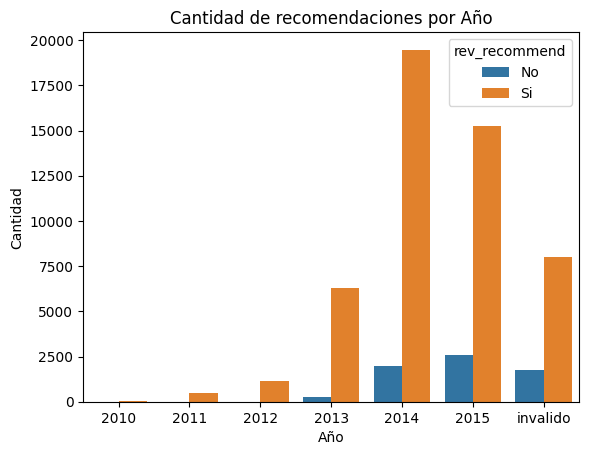

In [38]:

sns.countplot(data=reviews, x='año', hue='rev_recommend', order=sorted(reviews['año'].unique()))
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de recomendaciones por Año')
plt.legend(title='rev_recommend', labels=['No', 'Si'])
plt.show()

Segun la grafica anterior, la mayoria de las recomendaciones se hicieron en los años 2014 y 2015

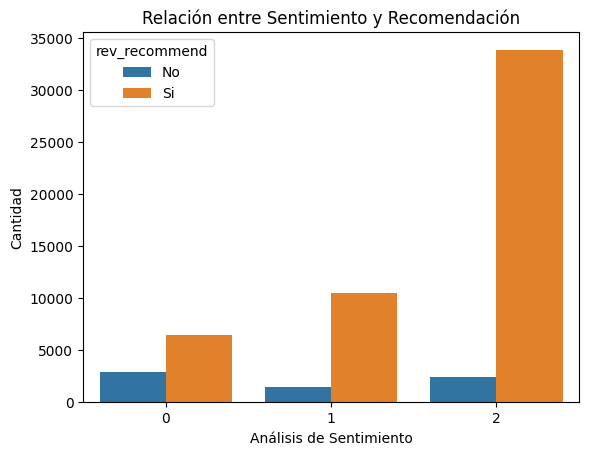

In [39]:
sns.countplot(x='sentiment_analysis', hue='rev_recommend', data=reviews)
plt.title('Relación entre Sentimiento y Recomendación')
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad')
plt.legend(title='rev_recommend', labels=['No', 'Si'])
plt.show()

En la grafica anterior se puede observar que el analisis de sentimiento tiene unos valores aceptables, pues la gran mayoria de recomendaciones esta en <br>
el analisis de sentimiento positivo (2)

## Items

In [40]:
items.head()

,item_id,item_name,playtime_forever,playtime_2weeks,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Se usa el metodo .info() para realizar una primera inspeccion de los datos

In [41]:
items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   steam_id          object
 5   items_count       int64 
 6   user_id           object
 7   user_url          object
dtypes: int64(3), object(5)
memory usage: 349.8+ MB


Se busca si hay valores nulos, faltantes y duplicados

In [42]:
print("Cantidad de valores nulos por columna")
items.isnull().sum()

Cantidad de valores nulos por columna


item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
steam_id            0
items_count         0
user_id             0
user_url            0
dtype: int64

In [43]:
print("Cantidad de valores faltantes por columna")
(items == '').sum()

Cantidad de valores faltantes por columna


item_id             0
item_name           0
playtime_forever    0
playtime_2weeks     0
steam_id            0
items_count         0
user_id             0
user_url            0
dtype: int64

In [44]:
print("Cantidad de filas duplicadas",items.duplicated().sum())

Cantidad de filas duplicadas 0


Se usa el metodo .describe() para detectar outliers o anomalías, parece que la columna  playtime_forever tiene algunos valores

In [45]:
items.describe()

,playtime_forever,playtime_2weeks,items_count
count,5.094105e+06,5.094105e+06,5.094105e+06
mean,9.905511e+02,9.069004e+00,3.157324e+02
std,5.414297e+03,1.403145e+02,6.969073e+02
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,7.100000e+01
50%,3.400000e+01,0.000000e+00,1.370000e+02
75%,3.550000e+02,0.000000e+00,2.750000e+02
max,6.427730e+05,1.996700e+04,7.762000e+03


Se usa un boxplot para observar los valores de playtime_forever

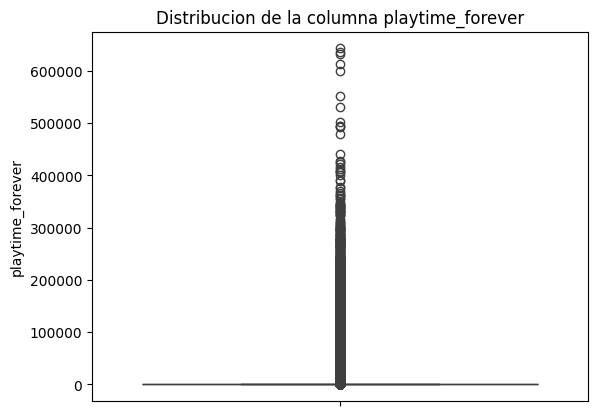

In [46]:
sns.boxplot(y=items['playtime_forever'])

# Mostrar el gráfico
plt.title('Distribucion de la columna playtime_forever')
plt.show()

En la grafica anterior no se puede observar bien la distribucion del tiempo jugado, al parecer los outliers son muy grandes y muchos valores son cero <br>

Se aplica un filtro a los valores de playtime_forever para lograr entender la distribucion.

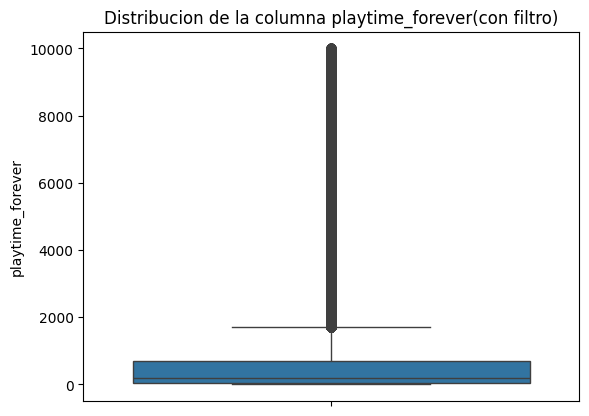

In [47]:
# Se filtran los datos  entre 1 y 10000
filtro = (items['playtime_forever'] > 0) & (items['playtime_forever'] <= 10000)
datos_filtrados = items[filtro]
sns.boxplot(y=datos_filtrados['playtime_forever'])
plt.title('Distribucion de la columna playtime_forever(con filtro)')
plt.show()

En este boxplot no se puede observar bien la distribucion de los valores. <br>
Se hace un histograma para observar mejor la distribucion. 

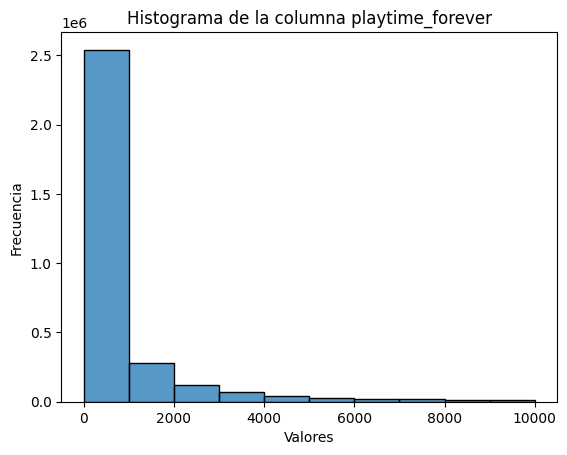

In [48]:
sns.histplot(data=datos_filtrados, x='playtime_forever', bins=10)  
plt.title('Histograma de la columna playtime_forever')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

En este histograma se puede apreciar que la gran mayoria de datos esta entre 0-1000. <br>


Se hacen las graficas para los valores que quedaron por fuera del filtro inicial

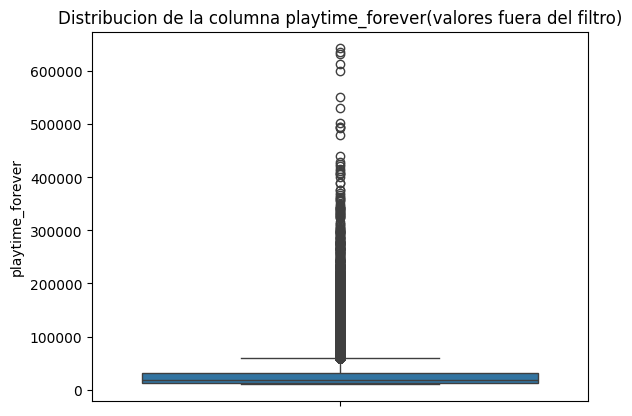

In [49]:
# Se filtran los datos  entre 1 y 10000
filtro2 = (items['playtime_forever'] > 10000) & (items['playtime_forever'].max())
datos_filtrados_mayores = items[filtro2]
sns.boxplot(y=datos_filtrados_mayores['playtime_forever'])
plt.title('Distribucion de la columna playtime_forever(valores fuera del filtro)')
plt.show()

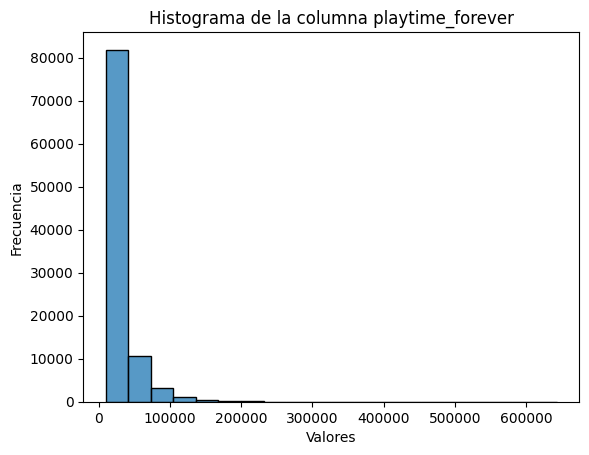

In [50]:
sns.histplot(data=datos_filtrados_mayores, x='playtime_forever', bins=20)  
plt.title('Histograma de la columna playtime_forever')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Segun las graficas anteriores se puede observar que la gran mayoria de valores estan entre 10000 y 30000

Se realiza el grafico de item con mas horas jugadas, usando el dataframe original items y el dagaframe filtrado de 0 -10000 en playtime_forever <br>
y se comparan los resultados obtenidos

TOP 10 de Item con mas horas de juego

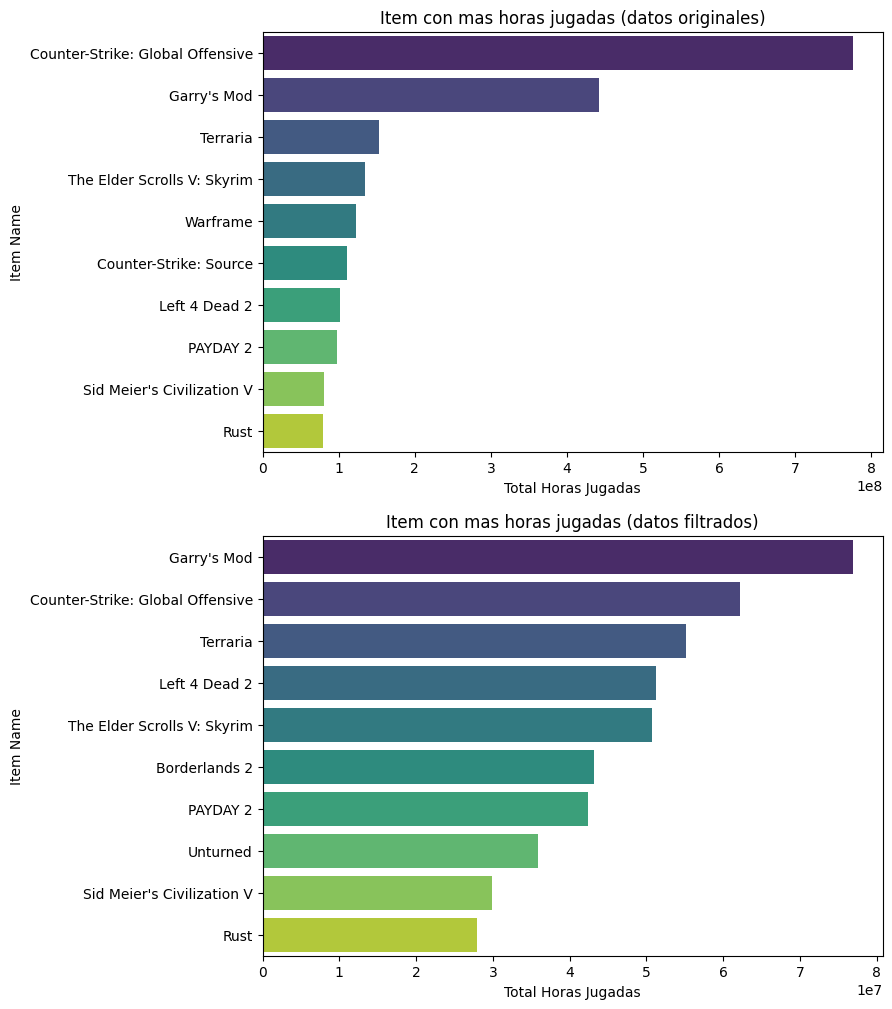

In [51]:
# Agrupar por nombre de ítem y sumar las horas jugadas
items_agrupado = items.groupby('item_name')['playtime_forever'].sum().reset_index()

# Seleccionar los 10 elementos con las horas jugadas más altas
top_10 = items_agrupado.nlargest(10, 'playtime_forever')


# Agrupar por nombre de ítem y sumar las horas jugadas
items_filtrado = datos_filtrados.groupby('item_name')['playtime_forever'].sum().reset_index()

# Seleccionar los 10 elementos con las horas jugadas más altas
top_10_filtrado = items_filtrado.nlargest(10, 'playtime_forever')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))



sns.barplot(y='item_name', x='playtime_forever', data=top_10, hue='item_name', palette='viridis', legend=False, ax=axes[0])
axes[0].set_ylabel('Item Name')
axes[0].set_xlabel('Total Horas Jugadas')
axes[0].set_title('Item con mas horas jugadas (datos originales)')




sns.barplot(y='item_name', x='playtime_forever', data=top_10_filtrado, hue='item_name', palette='viridis', legend=False, ax=axes[1])
axes[1].set_ylabel('Item Name')
axes[1].set_xlabel('Total Horas Jugadas')
axes[1].set_title('Item con mas horas jugadas (datos filtrados)')
plt.show()

Segun las graficas anteriores, se puede observar que aunque se repiten 8 items, las cantidades son diferentes y el orden en algunos coincide <br>
Se debe hacer un estudio mas profundo para determinar si  se podria tomar 10000 como dato de corte o  un valor un  <br>
mas alto y de ahi en adelante considerarlos como outliers o anomalías

## Games

In [52]:
games.head()

,publisher,genres,app_name,title,price,early_access,id,developer,rel_year
0,Kotoshiro,Action,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
1,Kotoshiro,Casual,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
2,Kotoshiro,Indie,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
3,Kotoshiro,Simulation,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018
4,Kotoshiro,Strategy,Lost Summoner Kitty,Lost Summoner Kitty,4.99,0.0,761140.0,Kotoshiro,2018


Se usa el metodo .info() para realizar una primera inspeccion de los datos

In [53]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71551 entries, 0 to 71550
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     71504 non-null  object 
 1   genres        71551 non-null  object 
 2   app_name      71551 non-null  object 
 3   title         71551 non-null  object 
 4   price         71551 non-null  float64
 5   early_access  71551 non-null  float64
 6   id            71551 non-null  float64
 7   developer     71551 non-null  object 
 8   rel_year      71551 non-null  object 
dtypes: float64(3), object(6)
memory usage: 4.9+ MB


Se busca si hay valores nulos, faltantes y duplicados

In [54]:
print("Cantidad de valores nulos por columna")
games.isnull().sum()

Cantidad de valores nulos por columna


publisher       47
genres           0
app_name         0
title            0
price            0
early_access     0
id               0
developer        0
rel_year         0
dtype: int64

Hay valores nulos en la columna  publisher, pero se ignora ya que la columna developer esta completa y es mas importante.

In [55]:
print("Cantidad de valores faltantes por columna")
(games == '').sum()

Cantidad de valores faltantes por columna


publisher       0
genres          0
app_name        0
title           0
price           0
early_access    0
id              0
developer       0
rel_year        0
dtype: int64

In [56]:
print("Cantidad de filas duplicadas",reviews.duplicated().sum())

Cantidad de filas duplicadas 0


In [57]:
games.describe()

,price,early_access,id
count,71551.000000,71551.000000,7.155100e+04
mean,8.444274,0.084108,4.625947e+05
std,15.767991,0.277551,1.741703e+05
min,0.000000,0.000000,1.000000e+01
25%,1.990000,0.000000,3.414650e+05
50%,4.990000,0.000000,4.568300e+05
75%,9.990000,0.000000,5.984750e+05
max,995.000000,1.000000,2.028850e+06


Se grafica el Top 10 de los generos que tienen mas juegos


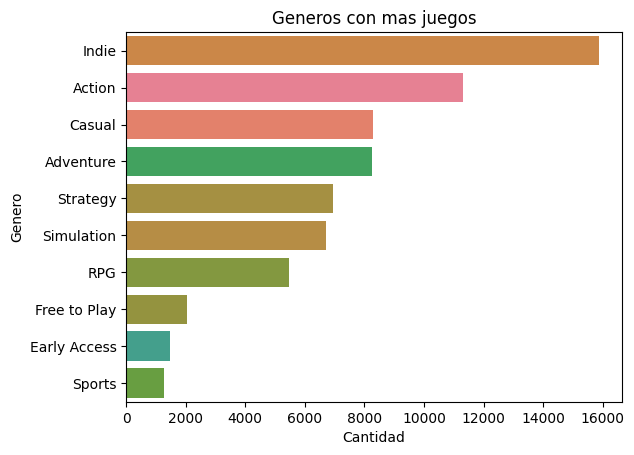

In [58]:
# Se cuentan los juegos por cada genero, luego se ordenan y finalmente se filtran para mostrar solo los 10 primeros
genre_counts = games['genres'].value_counts().sort_values(ascending=False).head(10).index
sns.countplot(y='genres', data=games, order=genre_counts, hue='genres', palette='husl', legend=False)
plt.title('Generos con mas juegos')
plt.xlabel('Cantidad')
plt.ylabel('Genero')
plt.show()

Se grafica el Top 10 de los developers que tienen mas juegos

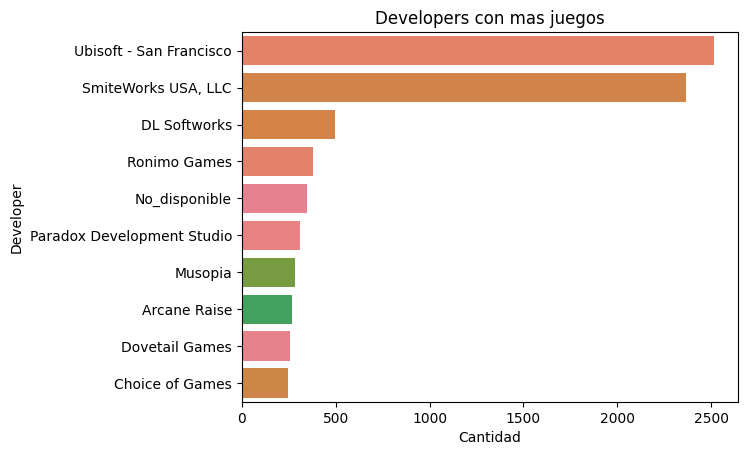

In [59]:
# Se cuentan la cantidad de juegos que ha hecho cada desarrollador, se ordenan y finalmente se filtran para mostrar solo los 10 primeros
developer_counts = games['developer'].value_counts().sort_values(ascending=False).head(10).index
sns.countplot(y='developer', data=games, order=developer_counts, hue='developer', palette='husl', legend=False)
plt.title('Developers con mas juegos')
plt.xlabel('Cantidad')
plt.ylabel('Developer')
plt.show()

### Dataset para el Sistema de Recomendacion

Para este dataset se necesita un Rating o valoracion de cada item, para nuestro caso en el dataframe reviews se tienen 2, el sentiment_analysis y rev_recommend. <br>
Se diseña un sistema de valoracion teniendo en cuenta lo anterior de la siguiente manera: <br> 
Cuando: <br>
sentiment_analysis = 0  y rev_recommend = 0  entonces Rating = 1  <br>
sentiment_analysis = 0  y rev_recommend = 1  entonces Rating = 1  <br>
sentiment_analysis = 1  y rev_recommend = 0  entonces Rating = 2  <br>
sentiment_analysis = 1  y rev_recommend = 1  entonces Rating = 3  <br>
sentiment_analysis = 2  y rev_recommend = 0  entonces Rating = 4  <br>
sentiment_analysis = 2  y rev_recommend = 1  entonces Rating = 5  <br>



Volviendo lo anterior codigo y aplicandolo a games tenemos:

In [60]:
# Se definen las condiciones y los valores a asignar
conditions = [
    (reviews['sentiment_analysis'] == 0) & (reviews['rev_recommend'] == 0),
    (reviews['sentiment_analysis'] == 0) & (reviews['rev_recommend'] == 1),
    (reviews['sentiment_analysis'] == 1) & (reviews['rev_recommend'] == 0),
    (reviews['sentiment_analysis'] == 1) & (reviews['rev_recommend'] == 1),
    (reviews['sentiment_analysis'] == 2) & (reviews['rev_recommend'] == 0),
    (reviews['sentiment_analysis'] == 2) & (reviews['rev_recommend'] == 1)
]

# Valores para cada condición
values = [1, 1, 2, 3, 4, 5]  

# Se aplican las condiciones y se asignan los valores usando np.select()
reviews['Rating'] = np.select(conditions, values, default=None)
reviews.head()

,user_id,user_url,variable,rev_item_id,rev_helpful,rev_recommend,año,sentiment_analysis,Rating
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,0,1250,No ratings yet,1,2011,2,5
1,js41637,http://steamcommunity.com/id/js41637,0,251610,15 of 20 people (75%) found this review helpful,1,2014,2,5
2,evcentric,http://steamcommunity.com/id/evcentric,0,248820,No ratings yet,1,invalido,2,5
3,doctr,http://steamcommunity.com/id/doctr,0,250320,2 of 2 people (100%) found this review helpful,1,2013,2,5
4,maplemage,http://steamcommunity.com/id/maplemage,0,211420,35 of 43 people (81%) found this review helpful,1,2014,1,3


Teniendo en cuenta que el objetivo final es entrenar un algoritmo que recomiende juegos segun el id del usuario y segun el id del juego. <br>
Se toma para este fin el dataframe reviews ya que este tiene toda la informacion necesaria para construir el sistema de recomendacion

In [61]:
training =  reviews[['rev_item_id', 'user_id', 'Rating']]
training = training.rename(columns={'rev_item_id':'item_id'})
training.head()


,item_id,user_id,Rating
0,1250,76561197970982479,5
1,251610,js41637,5
2,248820,evcentric,5
3,250320,doctr,5
4,211420,maplemage,3


Se guarda el dataset para el sistema de recomendacion

In [62]:
training.to_parquet('training.parquet')
print(f'Se guardó el archivo')

Se guardó el archivo
